In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import squarify as sf

In [2]:
df= pd.DataFrame({
    'hoten': ['nv1', 'nv2', 'nv3', 'nv4', 'nv5', 'nv6', 'nv7', 'nv8', 'nv9', 'nv10'],
    'chieucao': [158, 165, 169, 159, 172, 162, 166, 155, 166, 175],
    'cannang': [48, 58, 60, 55, 62, 60, 59, 55, 60, 64],
    'tuoi': [22, 25, 28, 25, 30, 29, 32, 28, 35, 31],
    'gioitinh': ['Nam', 'Nam', 'Nữ', 'Nam', 'Nữ', 'Nữ', 'Nam', 'Nam', 'Nữ', 'Nam'],
    'phong': ['kt', 'ns', 'ns', 'hc', 'kt', 'hc', 'ns', 'bh', 'bh', 'hc']
})
df

hoten  chieucao  cannang  tuoi gioitinh phong
0   nv1       158       48    22      Nam    kt
1   nv2       165       58    25      Nam    ns
2   nv3       169       60    28       Nữ    ns
3   nv4       159       55    25      Nam    hc
4   nv5       172       62    30       Nữ    kt
5   nv6       162       60    29       Nữ    hc
6   nv7       166       59    32      Nam    ns
7   nv8       155       55    28      Nam    bh
8   nv9       166       60    35       Nữ    bh
9  nv10       175       64    31      Nam    hc

In [3]:
# gom nhóm dữ liệu
df_group = df.groupby(by='phong', as_index=False).count()[['phong', 'hoten']]
df_group = df_group.rename(columns={'hoten': 'sonv'})
df_group

phong  sonv
0    bh     2
1    hc     3
2    kt     2
3    ns     3

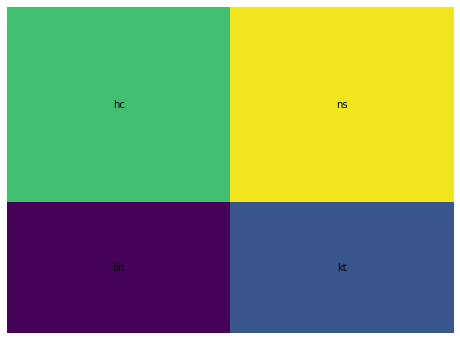

In [7]:
plt.figure(figsize=(8,6))
sf.plot(sizes=df_group['sonv'], label=df_group['phong'])
plt.axis('off')
plt.show()

In [8]:
phongs = {'hc': 'Hành chính', 'bh': 'Bán hàng', 'kt': 'Kế toán', 'ns': 'Nhân sự'}
df_group['tenphong'] = df_group['phong'].map(phongs)
df_group

phong  sonv    tenphong
0    bh     2    Bán hàng
1    hc     3  Hành chính
2    kt     2     Kế toán
3    ns     3     Nhân sự

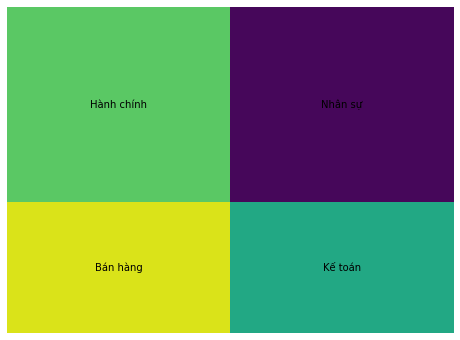

In [11]:
plt.figure(figsize=(8,6))
sf.plot(sizes=df_group['sonv'], label=df_group['tenphong'])
plt.axis('off')
plt.show()

In [39]:
def tao_nhan(row, tongsonv):
    sonv = row[1]
    label = str(row[2]) + '\nSố nv: ' + str(sonv) + '\nTỉ lệ: ' + str(round(sonv/tongsonv, 2))
    return label

In [40]:
tao_nhan(df_group.loc[0], 10)

'Bán hàng\nSố nv: 2\nTỉ lệ: 0.2'

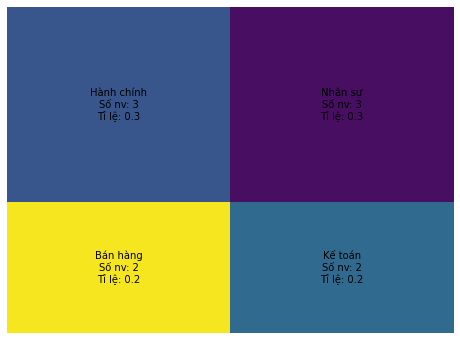

In [43]:
# tùy biến label
tongsonv = df_group['sonv'].sum()
# mylabels = df_group.apply(lambda x: tao_nhan(x, tongsonv), axis=1)
mylabels = df_group.apply(lambda x: str(x[2]) + '\nSố nv: ' + str(x[1]) + '\nTỉ lệ: ' + str(x[1]/tongsonv), axis=1)
# mylabels = df_group['sonv'].apply(lambda x: 'Số nv: ' + str(x) + '\nTỉ lệ: ' + str(x/tongsonv))
plt.figure(figsize=(8,6))
sf.plot(sizes=df_group['sonv'], label=mylabels)
plt.axis('off')
plt.show()

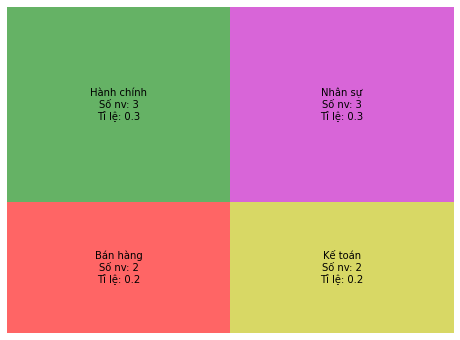

In [45]:
tongsonv = df_group['sonv'].sum()

mylabels = df_group.apply(lambda x: str(x[2]) + '\nSố nv: ' + str(x[1]) + '\nTỉ lệ: ' + str(x[1]/tongsonv), axis=1)
mycolors = ['r', 'g', 'y', 'm']
plt.figure(figsize=(8,6))
sf.plot(sizes=df_group['sonv'], label=mylabels, color=mycolors, alpha=0.6)
plt.axis('off')
plt.show()